# Data preprocessing

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
df = pd.read_csv(url ,                delim_whitespace=True,  # Use whitespace as delimiter
                 header=None,            # No header in the file
                 na_values='?')          # Replace '?' with NaN)
df.describe()

/tmp/ipykernel_10829/1731732170.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url ,                delim_whitespace=True,  # Use whitespace as delimiter


,0,1,2,3,4,5,6,7
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [3]:
attribute = {
    'mpg': 'continuous',
    'cylinders': 'multi-valued discrete',
    'displacement': 'continuous',
    'horsepower': 'continuous',
    'weight': 'continuous',
    'acceleration': 'continuous',
    'model year': 'multi-valued discrete',
    'origin': 'multi-valued discrete',
    'car name': 'string (unique for each instance)'
}

df.columns = list(attribute.keys())

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


## Describing : Mean, Max, Min, Modus

In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
for col in df.columns:
    print(f"\nModus {col}: ")
    print(df[col].mode())
    print("-----------")


Modus mpg: 
0    13.0
Name: mpg, dtype: float64
-----------

Modus cylinders: 
0    4
Name: cylinders, dtype: int64
-----------

Modus displacement: 
0    97.0
Name: displacement, dtype: float64
-----------

Modus horsepower: 
0    150.0
Name: horsepower, dtype: float64
-----------

Modus weight: 
0    1985.0
1    2130.0
Name: weight, dtype: float64
-----------

Modus acceleration: 
0    14.5
Name: acceleration, dtype: float64
-----------

Modus model year: 
0    73
Name: model year, dtype: int64
-----------

Modus origin: 
0    1
Name: origin, dtype: int64
-----------

Modus car name: 
0    ford pinto
Name: car name, dtype: object
-----------


## Missing Value Diagnose

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
for i in df.columns:
    print(f"\n{i}:")
    print(f"sum null = {df[i].isna().sum()}")


mpg:
sum null = 0

cylinders:
sum null = 0

displacement:
sum null = 0

horsepower:
sum null = 6

weight:
sum null = 0

acceleration:
sum null = 0

model year:
sum null = 0

origin:
sum null = 0

car name:
sum null = 0


## Diagnosa Outlier

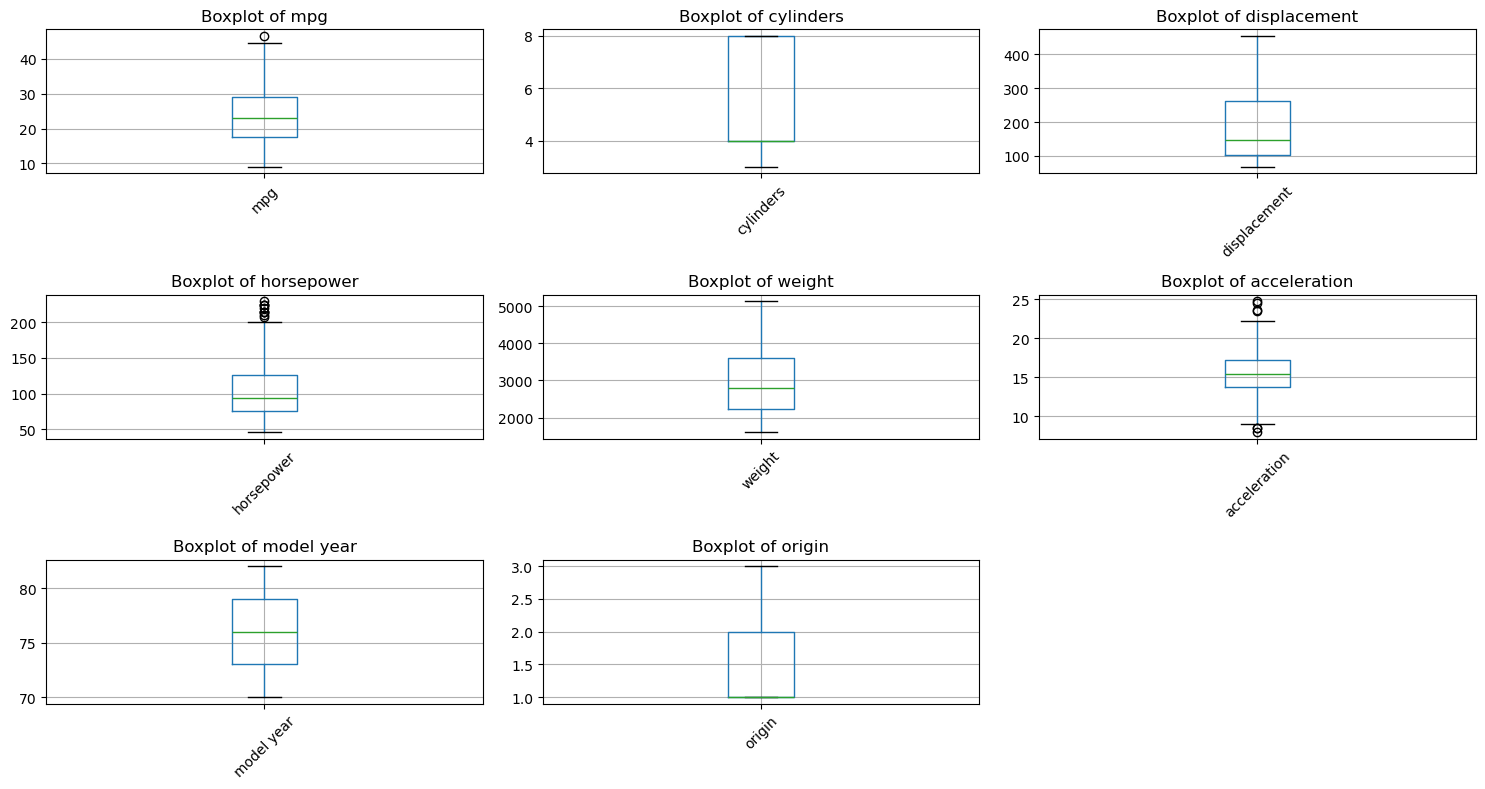

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.xticks([1], [col], rotation=45)

plt.tight_layout()  
plt.show()

In [10]:
def analyze_boxplot(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[column] < Q1 - 1.5*IQR) | (df[column] > Q3 + 1.5*IQR)][column]
    print(f"{column} outliers: {len(outliers)}")

# Analyze each numerical column
for col in numeric_cols:
    analyze_boxplot(df, col)

mpg outliers: 1
cylinders outliers: 0
displacement outliers: 0
horsepower outliers: 10
weight outliers: 0
acceleration outliers: 7
model year outliers: 0
origin outliers: 0


## Penanganan Missing Value

In [11]:
df['horsepower'].fillna(df.horsepower.mode()[0], inplace=True)
df['horsepower']
df.describe()


/tmp/ipykernel_10829/3351599266.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df.horsepower.mode()[0], inplace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,105.155779,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.600986,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


# Data reduction

In [33]:
numeric = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
X = df.loc[:,numeric]
y = df['mpg']
X.shape[1]


7

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("Data setelah standardisasi:")
print(f"Mean: {np.mean(X_scaled, axis=0).round(3)}")
print(f"Std:  {np.std(X_scaled, axis=0).round(3)}")


Data setelah standardisasi:
Mean: [-0. -0. -0. -0. -0. -0. -0.]
Std:  [1. 1. 1. 1. 1. 1. 1.]


In [35]:
feat_col = ['feature'+str(i) for i in range(X.shape[1])]
normalized_df = pd.DataFrame(X_scaled, columns=feat_col)
normalized_df.describe()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-3.570567e-17,-1.785283e-17,-3.570567e-17,-1.606755e-16,-2.677925e-16,-1.642461e-15,-5.355850e-17
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.444949e+00,-1.204411e+00,-1.534423e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00,-7.151448e-01
25%,-8.563206e-01,-8.563178e-01,-7.562624e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01,-7.151448e-01
50%,-8.563206e-01,-4.314040e-01,-2.634275e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03,-7.151448e-01
75%,1.498191e+00,6.584879e-01,6.444263e-01,7.538337e-01,5.834349e-01,8.096310e-01,5.332220e-01
max,1.498191e+00,2.511784e+00,3.238294e+00,2.565185e+00,3.351912e+00,1.621983e+00,1.781589e+00


In [36]:
from sklearn.decomposition import PCA
pca_mpg = PCA(n_components=2)
principal_mpg = pca_mpg.fit_transform(X_scaled)

In [39]:
principal_df = pd.DataFrame(data=principal_mpg, columns=['Principal1','Principal2'])

principal_df.head(5)

,Principal1,Principal2
0,2.656902,-0.982340
1,3.387980,-1.102433
2,3.002337,-1.232310
3,2.831578,-1.070697
4,2.881017,-1.298998


In [41]:
print('Explained variability per principal component: {}'.format(pca_mpg.explained_variance_ratio_))


Explained variability per principal component: [0.6527141  0.13384319]


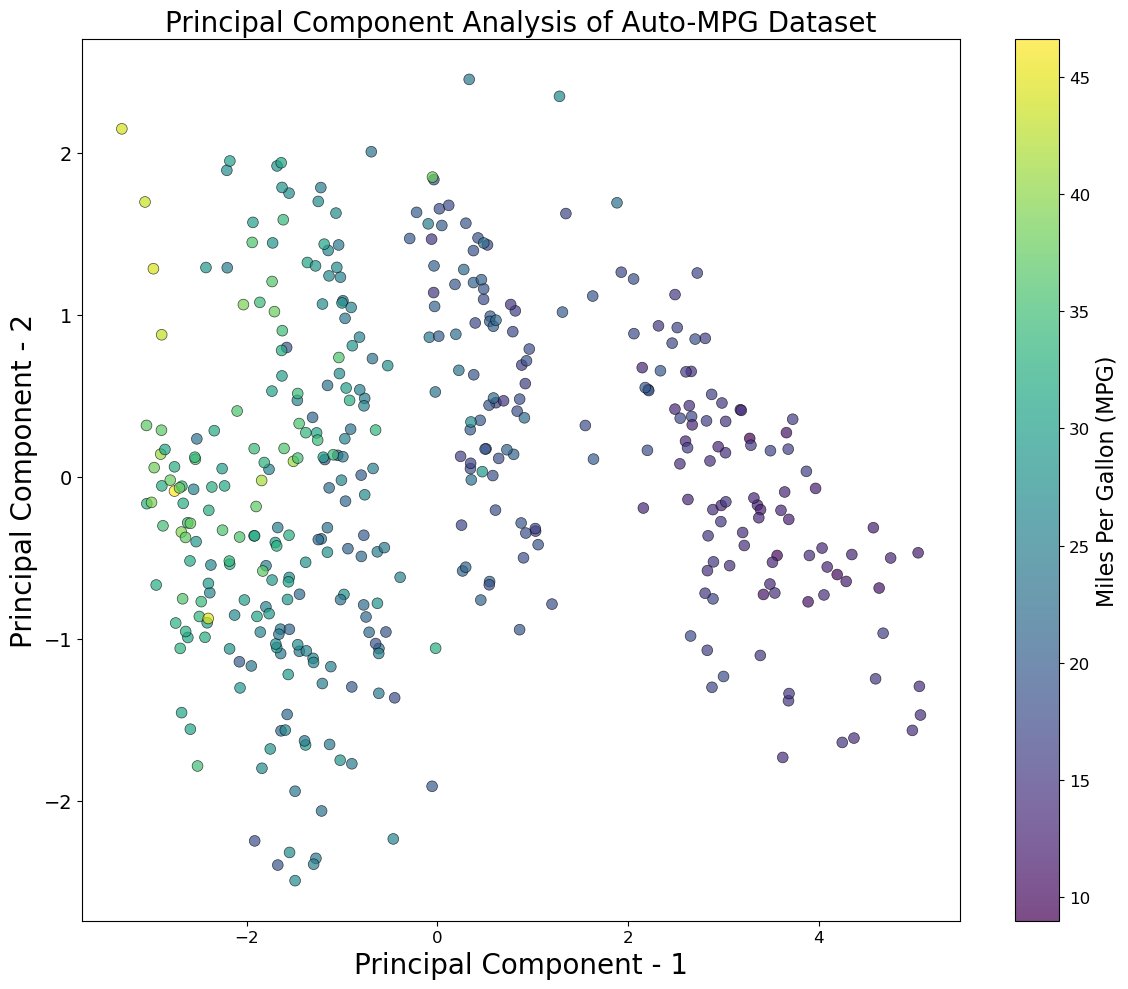

In [44]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title("Principal Component Analysis of Auto-MPG Dataset", fontsize=20)

# Scatter plot dengan color mapping berdasarkan nilai MPG
scatter = plt.scatter(principal_mpg[:, 0], principal_mpg[:, 1], 
                     c=y, 
                     cmap='viridis',  # atau 'RdYlBu_r' untuk red-yellow-blue
                     s=60, 
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=0.5)

# Colorbar untuk menunjukkan skala MPG
colorbar = plt.colorbar(scatter)
colorbar.set_label('Miles Per Gallon (MPG)', fontsize=16)
colorbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(principal_mpg, y, test_size=0.2)

# Train berbagai model
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name}: R² = {score:.4f}")

Linear Regression: R² = 0.7350
Random Forest: R² = 0.7849
SVM: R² = 0.8327


# Rescale, binarize, standarize

In [50]:

df.describe()
df_copy = df.copy()
df_copy.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,105.155779,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.600986,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Rescale

In [ ]:
# model year, cylinders (step =1)
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

arr_df = df_copy.values

year_original = arr_df[:,6].reshape(-1,1)
cylinder_original= arr_df[:,1].reshape(-1,1)

year_scaled = minmax.fit_transform(year_original)
cylinder_scaled = minmax.fit_transform(cylinder_original)

print(f"Year - Mean: {year_scaled.mean():.3f}, Min: {year_scaled.min():.3f}, Max: {year_scaled.max():.3f}")
print(f"Cylinder - Mean: {cylinder_scaled.mean():.3f}, Min: {cylinder_scaled.min():.3f}, Max: {cylinder_scaled.max():.3f}")



Year - Mean: 0.501, Min: 0.000, Max: 1.000
Cylinder - Mean: 0.491, Min: 0.000, Max: 1.000


## Binarize

In [56]:
# mpg as biner representation
mpg_original = arr_df[:,0].reshape(-1,1)

from sklearn.preprocessing import Binarizer
biner = Binarizer(threshold=mpg_original.mean())
binary_mpg = biner.fit_transform(mpg_original)

mpg_original = arr_df[:,6].reshape(-1,1)

binary_mpg = minmax.fit_transform(mpg_original)

print(f"Year - Mean: {binary_mpg.mean():.3f}, Min: {binary_mpg.min():.3f}, Max: {binary_mpg.max():.3f}")


Year - Mean: 0.501, Min: 0.000, Max: 1.000


## Standarize


In [ ]:
#displacement, horsepower, weight (dhw)
dhw_class = ['displacement','horsepower','weight']
dhw = arr_df[:,[2,3,4]].reshape(-1,3)
standard = StandardScaler()

standard_dhw = standard.fit_transform(dhw)

for idx, col in enumerate(dhw_class):
    print(f"{col} - Mean: {standard_dhw[:,idx].mean():.3f}, Min: {standard_dhw[:,idx].min():.3f}, Max: {standard_dhw[:,idx].max():.3f}")



displacement - Mean: -0.000, Min: -1.204, Max: 2.512
horsepower - Mean: -0.000, Min: -1.534, Max: 3.238
weight - Mean: -0.000, Min: -1.605, Max: 2.565
